In [1]:
upos_maps={'a':'ADJ', 'p':'ADP', 'd':'ADV',
           'u':'AUX', 'c':'CCONJ', 'h':'DET',
           'e':'INTJ', 'n':'NOUN', 'm':'NUM',
           'z':'PART', 'r':'PRON', 'nh':'PROPN',
           'wp':'PUNCT', 'ws':'SYM',
           'v':'VERB', 'x':'X'
          }
upos_rev_maps={'SCONJ':['c'], 'NOUN':['ni', 'nl', 'ns', 'nt', 'nz', 'n', 'nd', 'nh']}

class WordUnit(object):
    def __init__(self, text, dependency_relation, governor, head_text, pos, netag):
        self.text=text
        self.dependency_relation=dependency_relation
        self.governor=governor
        self.head_text=head_text
        self.pos=pos
        self.upos='X'
        if pos in upos_maps:
            self.upos=upos_maps[pos]
        else:
            for k,v in upos_rev_maps.items():
                if pos in v:
                    self.upos=k
        self.netag=netag


送 --> 我|SBV|r|O
花 --> 送|HED|v|O
送 --> 她|IOB|r|O
束 --> 一|ATT|m|O
花 --> 束|ATT|q|O
送 --> 花|VOB|n|O


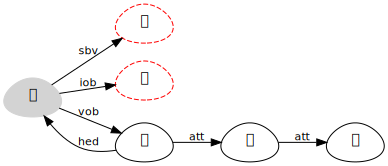

In [4]:
class EnhancedLtpViz(object):
    """
    from sagas.zh.ltp_viz import EnhancedLtpViz
    ana=lambda sents: EnhancedLtpViz().deps(sents)
    """
    def __init__(self):
        from graphviz import Digraph
        from sagas.zh.ltp_procs import LtpProcs, ltp

        if ltp is None:
            ltp = LtpProcs()
        self.ltp = ltp
        self.f = Digraph('deps', filename='deps.gv')
        self.f.attr(rankdir='LR', size='6,4')
        self.f.attr('node', shape='egg', fontname='Calibri')
        
        self.prop_sets={'VERB':lambda f: f.attr('node', style='filled', color='lightgrey'),
                   'PRON':lambda f: f.attr('node', style='dashed', color='red'),
                   'AUX':lambda f: f.attr('node', style='dashed', color='green'),
                   'NOUN':lambda f: f.attr('node', style='solid', color='blue'),
                  }

    def default_node(self):
        self.f.attr('node', style='solid', color='black')
        
    def deps(self, sentence):
        words = self.ltp.segmentor.segment(sentence)
        postags = self.ltp.postagger.postag(words)
        arcs = self.ltp.parser.parse(words, postags)
        roles = self.ltp.labeller.label(words, postags, arcs)
        netags = self.ltp.recognizer.recognize(words, postags)

        # nodes
        for i in range(len(words)):
            a = words[int(arcs[i].head) - 1]
            print("%s --> %s|%s|%s|%s" % (a, words[i], \
                                          arcs[i].relation, postags[i], netags[i]))
            unit=WordUnit(text=words[i], 
                          dependency_relation=arcs[i].relation.lower(), 
                          governor=arcs[i].head, 
                          head_text=a, pos=postags[i], netag=netags[i])
            rel=unit.dependency_relation
            if rel in ['adv', 'coo', 'vob', 'att']:
                if unit.upos=='VERB':
                    self.f.attr('node', style='filled', color='antiquewhite')
                else:
                    self.default_node()
            elif unit.upos in self.prop_sets:
                self.prop_sets[unit.upos](self.f)
            else:
                self.default_node()
            self.f.node(unit.text)
        
        # relations
        for i in range(len(words)):
            a = words[int(arcs[i].head) - 1]
            self.f.edge(a, words[i], 
                        label=arcs[i].relation.lower(),
                        fontsize='11', fontname='Calibri'
                       )
        return self.f

ana=lambda sents: EnhancedLtpViz().deps(sents)
ana('我送她一束花')

論壇 --> 達沃斯|ATT|ns|S-Ns
經濟 --> 世界|ATT|n|O
論壇 --> 經濟|ATT|n|O
是 --> 論壇|SBV|n|O
。 --> 是|HED|v|O
領袖 --> 每年|ATT|r|O
政 --> 全球|ATT|n|O
商界 --> 政|ATT|n|O
領袖 --> 商界|ATT|n|O
聚 --> 領袖|SBV|n|O
盛事 --> 聚|ATT|v|O
聚 --> 在|CMP|p|O
在 --> 一起|POB|nl|O
聚 --> 的|RAD|u|O
盛事 --> 年度|ATT|n|O
是 --> 盛事|VOB|n|O
是 --> 。|WP|wp|O


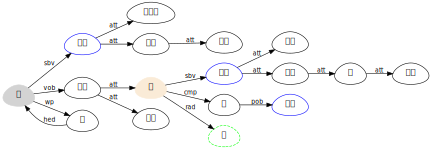

In [5]:
ana('達沃斯世界經濟論壇是每年全球政商界領袖聚在一起的年度盛事。')

现有 --> 朝鲜语|SBV|nz|O
可用 --> 现有|HED|v|O
个 --> 11172|ATT|m|O
音节 --> 个|ATT|q|O
现有 --> 音节|VOB|n|O
现有 --> 可用|COO|v|O


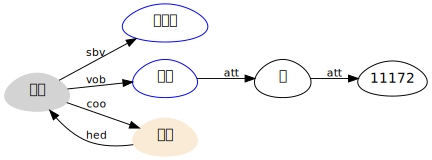

In [33]:
ana('朝鲜语现有11172个音节可用')

书 --> 他|ATT|r|O
书 --> 什么|ATT|r|O
读 --> 书|FOB|n|O
读 --> 都|ADV|d|O
读 --> 读|HED|v|O


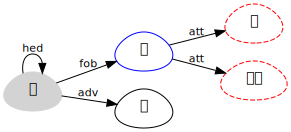

In [34]:
ana('他什么书都读')

请 --> 他|SBV|r|O
吃饭 --> 请|HED|v|O
请 --> 我|DBL|r|O
请 --> 吃饭|VOB|v|O


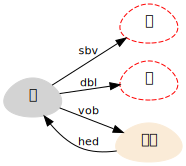

In [37]:
ana('他请我吃饭')

来 --> 他|SBV|r|O
来 --> 三月份|ADV|nt|O
来 --> 要|ADV|v|O
访问 --> 来|HED|v|O
来 --> 访问|COO|v|O


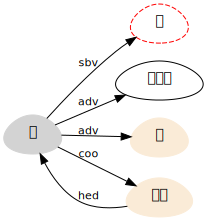

In [31]:
ana('他三月份要来访问')